<a href="https://colab.research.google.com/github/k-chiou/InsultDetector/blob/master/SimpleML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://www.ftext.org/text/subsubsection/2365

![代替テキスト](https://s3-ap-northeast-1.amazonaws.com/ftext/mathII/p106.png)

問題：A(−3, 1), B(2, −4)を通る直線上, P(3, y)の y は？

X : [-3, 2]　→　　f　 →　Y : [1, -4]

方法（数学公式）： ${y - y_{1}} = \frac{y_{2} - y_{1}}{x_{2} - x_{1}} ({x - x_{1}})$

f：$f(x) = y = - (x+2)$

⇒　$y = f(3) = -5$

## init

$X_{m,n} =
 \begin{bmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
  x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{m,1} & x_{m,2} & \cdots & x_{m,n}
 \end{bmatrix}$ 
 $Y_{m,k} =
 \begin{bmatrix}
  y_{1,1} & y_{1,2} & \cdots & y_{1,k} \\
  y_{2,1} & y_{2,2} & \cdots & y_{2,k} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  y_{m,1} & y_{m,2} & \cdots & y_{m,k}
 \end{bmatrix}$
 
 $f(X_{m,n}) = Y_{m,k}$
 
 ⇒ $f(\begin{bmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
  x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{m,1} & x_{m,2} & \cdots & x_{m,n}
 \end{bmatrix}) = \begin{bmatrix}
  y_{1,1} & y_{1,2} & \cdots & y_{1,k} \\
  y_{2,1} & y_{2,2} & \cdots & y_{2,k} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  y_{m,1} & y_{m,2} & \cdots & y_{m,k}
 \end{bmatrix}$
 
 分類(Classification)の場合、
 
> m： データの件数
 
> n： 特徴数

> k： 種類数
 
 回帰(Regression)の場合、
 
> m： データの件数
 
> n： 特徴数

> k = 1

 構造(Structure)の場合、2次元以上？

In [0]:
x = np.array([-3, 2])
x = x.reshape(2, 1)
y = np.array([1, -4])

In [0]:
print(x)
print(y)

print(x.shape)
print(y.shape)

[[-3]
 [ 2]]
[ 1 -4]
(2, 1)
(2,)


In [0]:
# 決定木
from sklearn.tree import DecisionTreeRegressor
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# XGBoost
from xgboost import XGBRegressor
# 線形回帰
from sklearn.linear_model import LinearRegression
# 数列計算のライブラリ
import numpy as np

In [0]:
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()
lr = LinearRegression()

## fit

In [0]:
dtr.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
rfr.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
xgbr.fit(x, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## predict

In [0]:
dtr.predict([[3]])

array([-4.])

In [0]:
rfr.predict([[3]])

array([-2.5])

In [0]:
xgbr.predict([[3]])

array([-3.9733567], dtype=float32)

In [0]:
lr.predict([[3]])

array([-5.])

## evaluate & fit again

In [0]:
data_length = 10
x_set = np.random.randint(-1000, 1000, data_length)
y_set = -2 - x_set
x_set = x_set.reshape(data_length, 1)
print(x_set.T)
print(y_set)

[[-400 -109   63 -423  911  956  692 -724 -704 -575]]
[ 398  107  -65  421 -913 -958 -694  722  702  573]


In [0]:
print("DT: %f" % dtr.score(x_set, y_set))
print("RF: %f" % rfr.score(x_set, y_set))
print("XGB: %f" % xgbr.score(x_set, y_set))
print("LR: %f" % lr.score(x_set, y_set))

DT: 0.004653
RF: 0.000566
XGB: 0.004613
LR: 1.000000


In [0]:
print("DT: %s" % dtr.predict(x_set))
print("RF: %s" % rfr.predict(x_set))
print("XGB: %s" % xgbr.predict(x_set))

DT: [ 1.  1. -4.  1. -4. -4. -4.  1.  1.  1.]
RF: [ 0.5  0.5 -1.5  0.5 -1.5 -1.5 -1.5  0.5  0.5  0.5]
XGB: [ 0.99703985  0.99703985 -3.9733567   0.99703985 -3.9733567  -3.9733567
 -3.9733567   0.99703985  0.99703985  0.99703985]


In [0]:
rfr.fit(x_set, y_set)
dtr.fit(x_set, y_set)
xgbr.fit(x_set, y_set)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
print("DT: %f" % dtr.score(x_set, y_set))
print("RF: %f" % rfr.score(x_set, y_set))
print("XGB: %f" % xgbr.score(x_set, y_set))

DT: 1.000000
RF: 0.996146
XGB: 0.999993


## 画像化

### DT

In [0]:
!pip install pydotplus 1>/dev/null
!pip install ipywidgets 1>/dev/null
!apt-get install graphviz 1>/dev/null

In [0]:
from IPython.display import Image
from io import StringIO
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

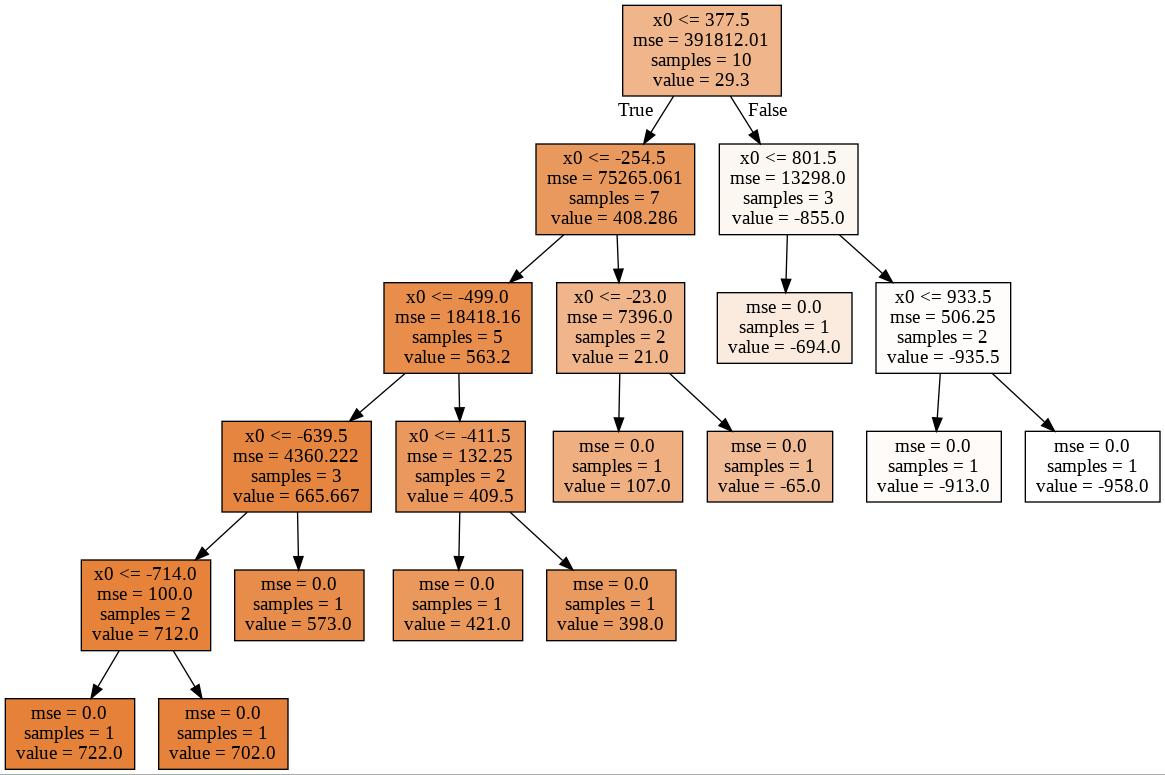

In [0]:
dot_data = StringIO()
export_graphviz(dtr, feature_names=['x{}'.format(i) for i in range(x_set.shape[1])], 
                out_file=dot_data, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_jpg())

### Compare

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
x_set2 = np.random.randint(-1000, 1000, 1000)
y_set2 = -2 - x_set
x_set2 = x_set.reshape(data_length, 1)

Text(0.5,1,'XGB')

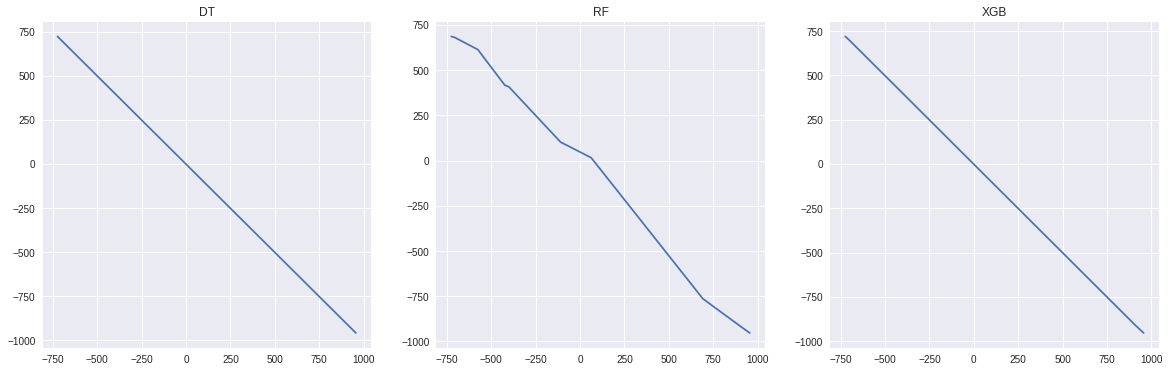

In [0]:
fig, axs = plt.subplots(1, 3, figsize=(20,6))
x_set_sort = np.sort(x_set2, axis=0)
axs[0].plot(x_set_sort, dtr.predict(x_set_sort))
axs[0].set_title('DT')
axs[1].plot(x_set_sort, rfr.predict(x_set_sort))
axs[1].set_title('RF')
axs[2].plot(x_set_sort, xgbr.predict(x_set_sort))
axs[2].set_title('XGB')